# Machine learning summative assessment - Airline Avionics

## Task 1 Import and clean data

### Import Libraries

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split   # for test train Split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import linear_model                       # for linear regression modeling
from sklearn import preprocessing                      # for preprocessing like imputting missing values

In [4]:
%matplotlib inline

### Load the data

Load both the ml_summative_raw.csv.

In [5]:
# read data file 
data = pd.read_csv('ml_summative_raw.csv')

In [6]:
data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


#### Clean data

In [7]:
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                     65504
Spin-Up Time                                                                                   2
Start/Stop Count                                                                               2
Reallocated Sectors Count                                                                      2
Seek Error Rate               

In [8]:
data.dtypes

Unnamed: 0                                                                                   int64
date                                                                                        object
serial_number                                                                               object
model                                                                                       object
capacity_bytes                                                                               int64
failure                                                                                      int64
Throughput Performance                                                                     float64
Spin-Up Time                                                                               float64
Start/Stop Count                                                                           float64
Reallocated Sectors Count                                                                  float64
Seek Error

In [9]:
data = data.fillna(data.median(axis=0))

In [10]:
data.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                         0
Spin-Up Time                                                                                   0
Start/Stop Count                                                                               0
Reallocated Sectors Count                                                                      0
Seek Error Rate               

### Dropping columns

I dropped 'Unnamed: 0', 'date', 'serial_number', 'Soft Read Error Rate', 'smart_15', 'Current Helium Level' & 'Soft Read Error Rateor'.

In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('serial_number', axis=1, inplace=True)

data.drop('Soft Read Error Rate', axis=1, inplace=True)
data.drop('smart_15', axis=1, inplace=True)
data.drop('Current Helium Level', axis=1, inplace=True)
data.drop('Soft Read Error Rateor', axis=1, inplace=True)

In [12]:
data.head()

,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,ST4000DM000,4000787030016,0,133.0,96.0,100.0,100.0,77.0,113.0,99.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,114.0
1,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,100.0,113.0,99.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,100.0
2,ST4000DM000,4000787030016,0,133.0,91.0,100.0,100.0,84.0,113.0,81.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,120.0
3,ST4000DM000,4000787030016,0,133.0,91.0,100.0,100.0,88.0,113.0,76.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,117.0
4,WDC WD20EFRX,2000398934016,0,133.0,100.0,100.0,200.0,100.0,113.0,86.0,...,81.0,100.0,100.0,100.0,100.0,1.0,1.0,1.0,100.0,200.0


#### Data statistics

In [13]:
data.describe()

,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
count,7.513000e+04,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,3.666340e+12,0.018594,132.626461,102.174644,99.985612,109.127818,93.192333,113.980061,83.165500,101.145162,...,80.997844,100.0,99.960841,100.078531,100.078531,1.001318,1.026354,1.383455,100.078531,118.833520
std,1.423955e+12,0.135089,12.304060,21.577020,0.481049,31.055141,26.428773,12.745218,13.571582,13.167475,...,0.828614,0.0,0.993227,2.801248,2.801248,0.361184,1.615060,6.149434,2.801248,28.291613
min,-1.000000e+00,0.000000,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,...,56.000000,100.0,71.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,15.275819
25%,4.000787e+12,0.000000,133.000000,92.000000,100.000000,100.000000,84.000000,113.000000,74.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,111.000000
50%,4.000787e+12,0.000000,133.000000,95.000000,100.000000,100.000000,87.000000,113.000000,85.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,116.000000
75%,4.000787e+12,0.000000,133.000000,98.000000,100.000000,100.000000,90.000000,113.000000,94.000000,100.000000,...,81.000000,100.0,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,100.000000,118.000000
max,8.001563e+12,1.000000,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,...,98.000000,100.0,100.000000,200.000000,200.000000,100.000000,100.000000,100.000000,200.000000,200.000000


In [14]:
data.index

RangeIndex(start=0, stop=75130, step=1)

In [15]:
data.shape

(75130, 43)

## Task 2 Inspect and visualize the data

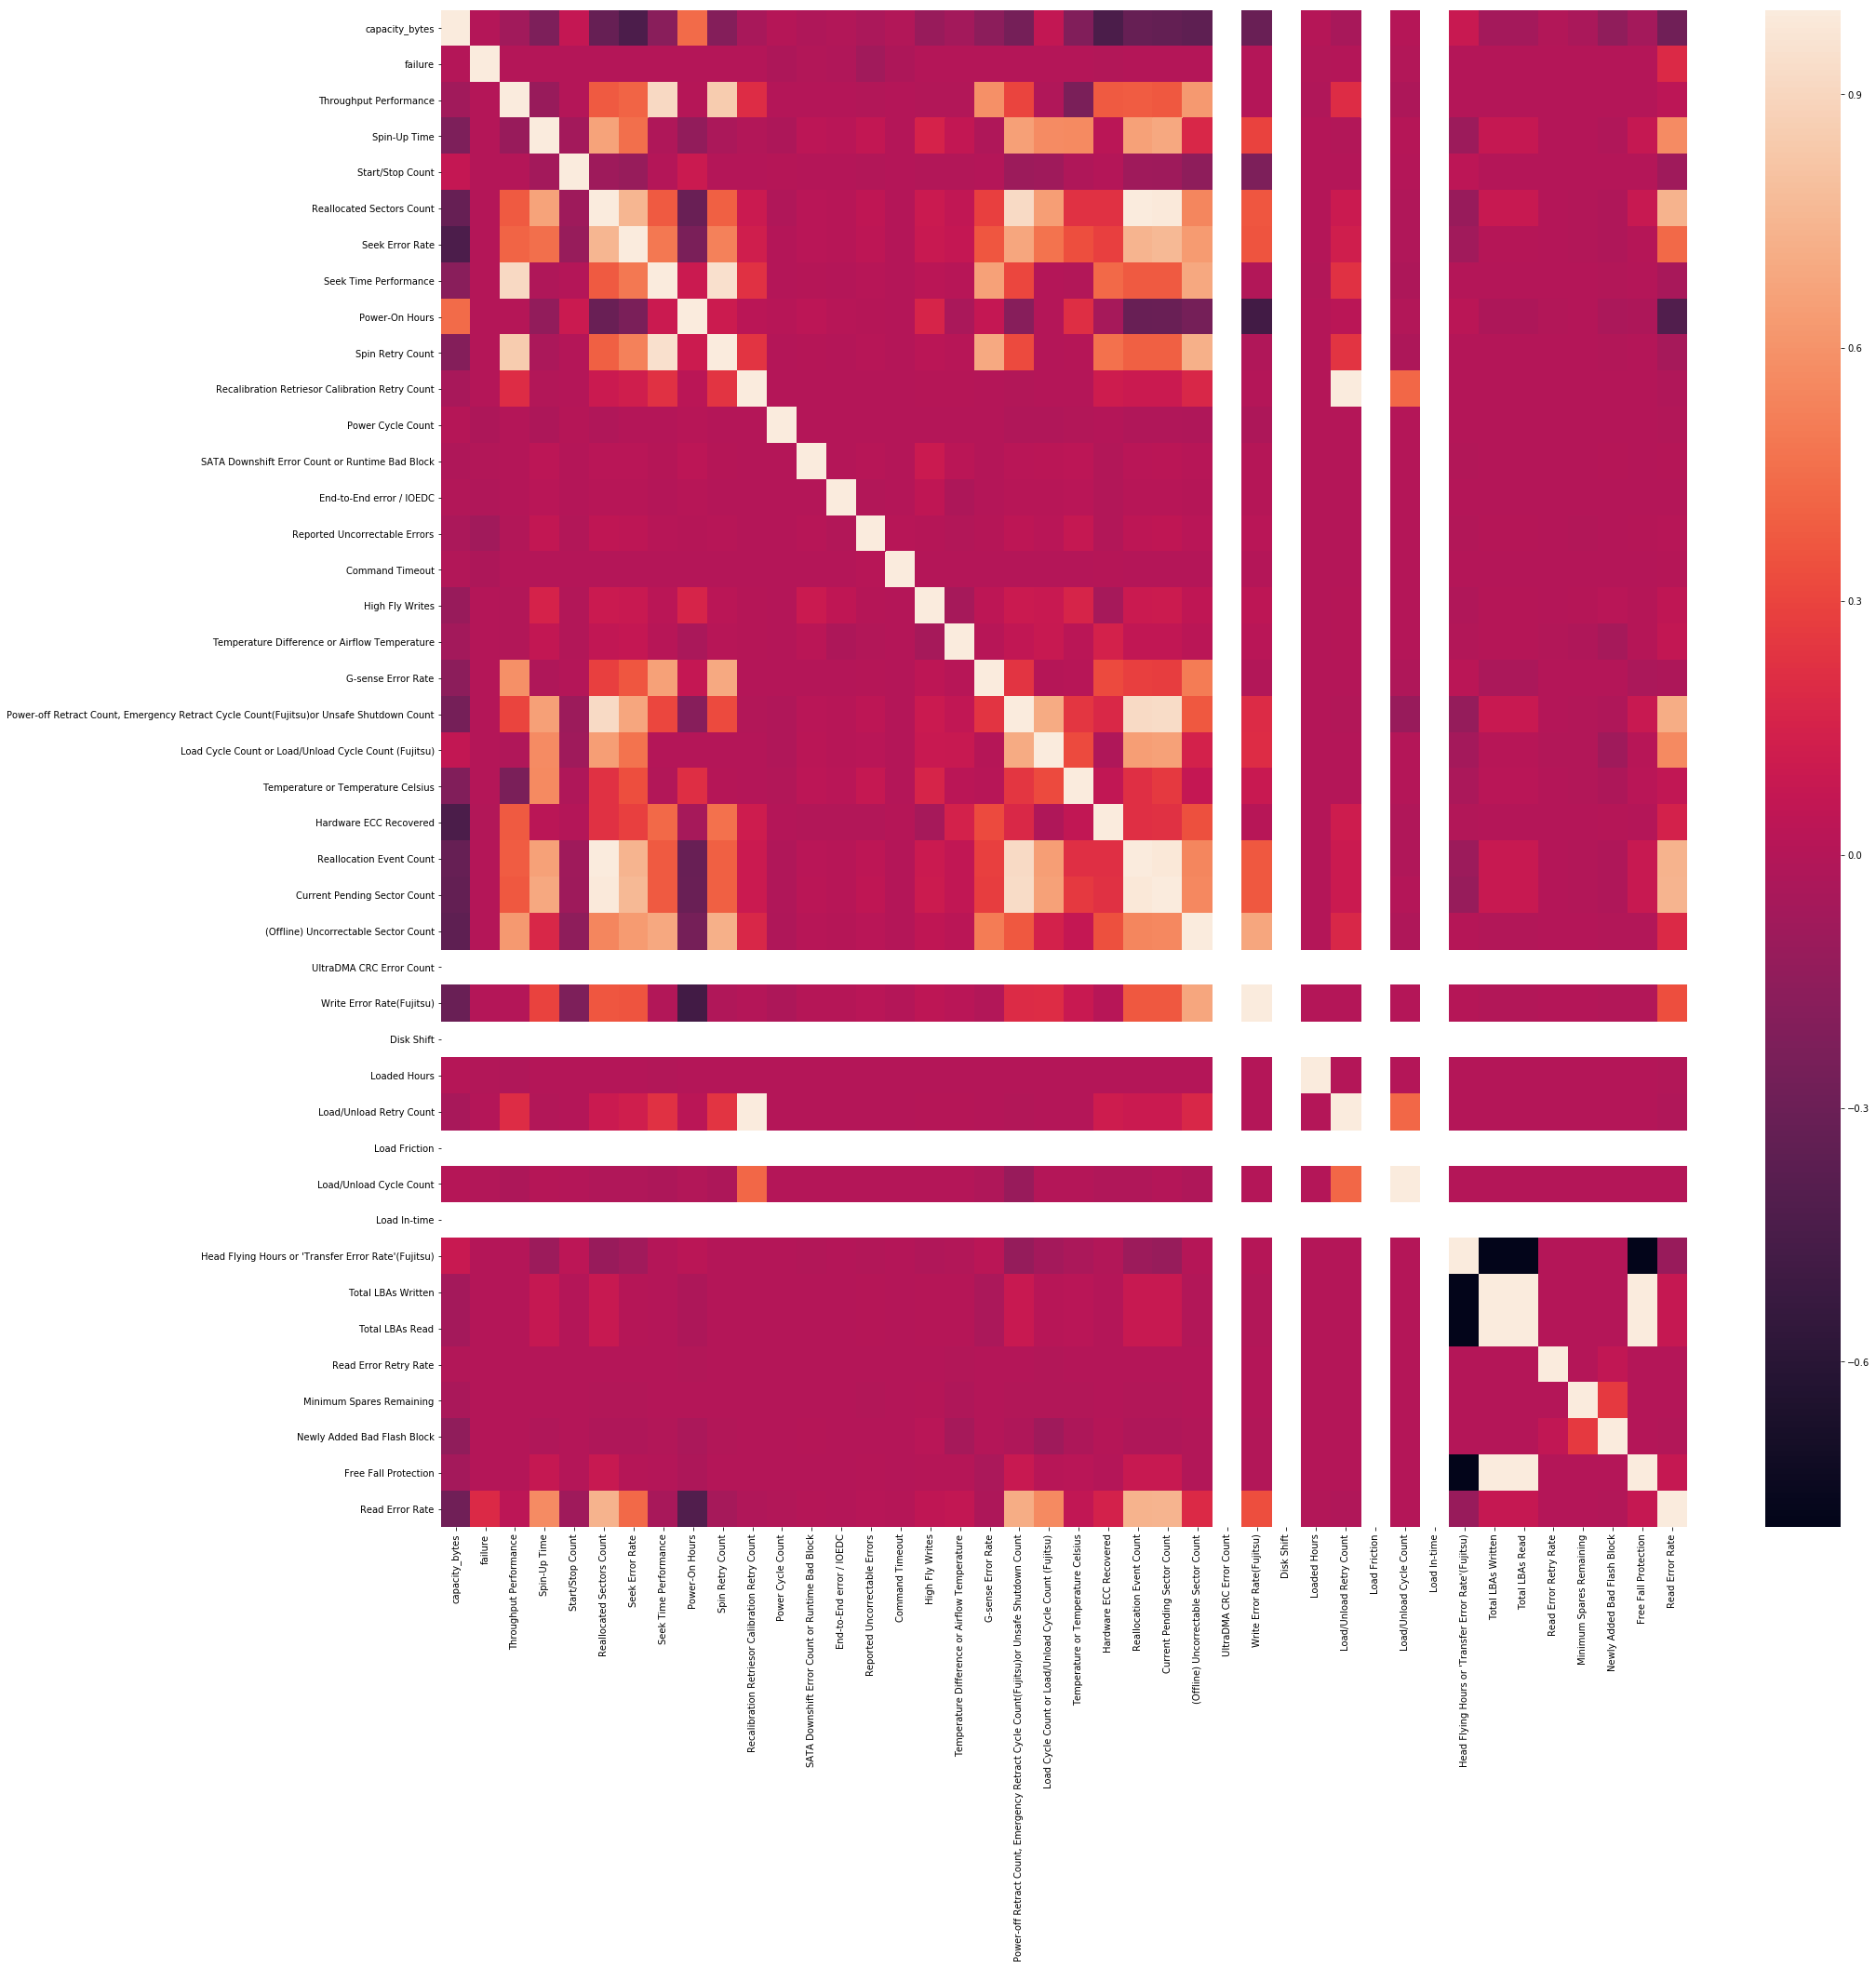

In [16]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The data set was too large for me to visualize and inspect all the features - so dove straight into Task 3

## Task 3 Feature engineering

### Visualization of only a view features

As this data set is quite large, I googled S.M.A.R.T for the hightest feuture failure rate and used those:
- https://www.computerworld.com/article/2846009/the-5-smart-stats-that-actually-predict-hard-drive-failure.html
- https://www.usenix.org/system/files/conference/atc17/atc17-mahdisoltani.pdf


In [17]:
# create data frame with variables for model
data1 = data.filter(['failure','Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
                            'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count'], axis=1)

In [18]:
data1.head()

,failure,Reallocated Sectors Count,Reported Uncorrectable Errors,Command Timeout,Current Pending Sector Count,(Offline) Uncorrectable Sector Count
0,0,100.0,100.0,100.0,100.0,100.0
1,0,100.0,100.0,100.0,100.0,100.0
2,0,100.0,100.0,100.0,100.0,100.0
3,0,100.0,100.0,100.0,100.0,100.0
4,0,200.0,100.0,100.0,200.0,100.0


#### Visualizing the sub set of data 

Text(0.5,1,'S.M.A.R.T selected feature set')

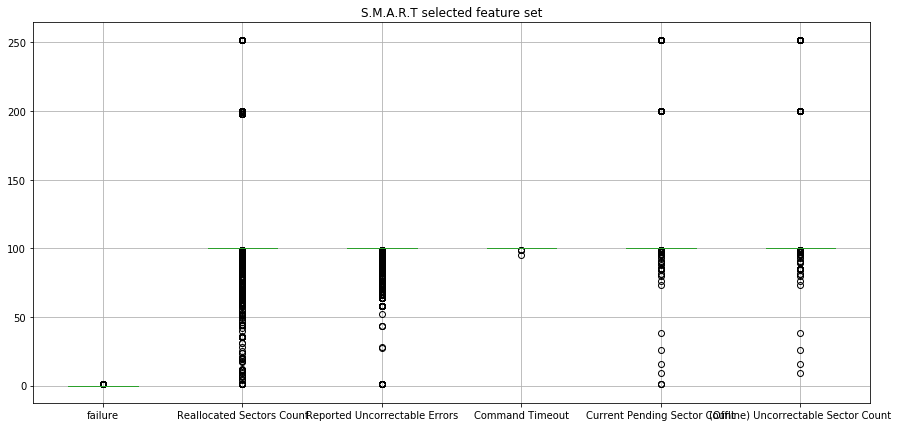

In [35]:
data1.boxplot(figsize=(15,7))
plt.title('S.M.A.R.T selected feature set')

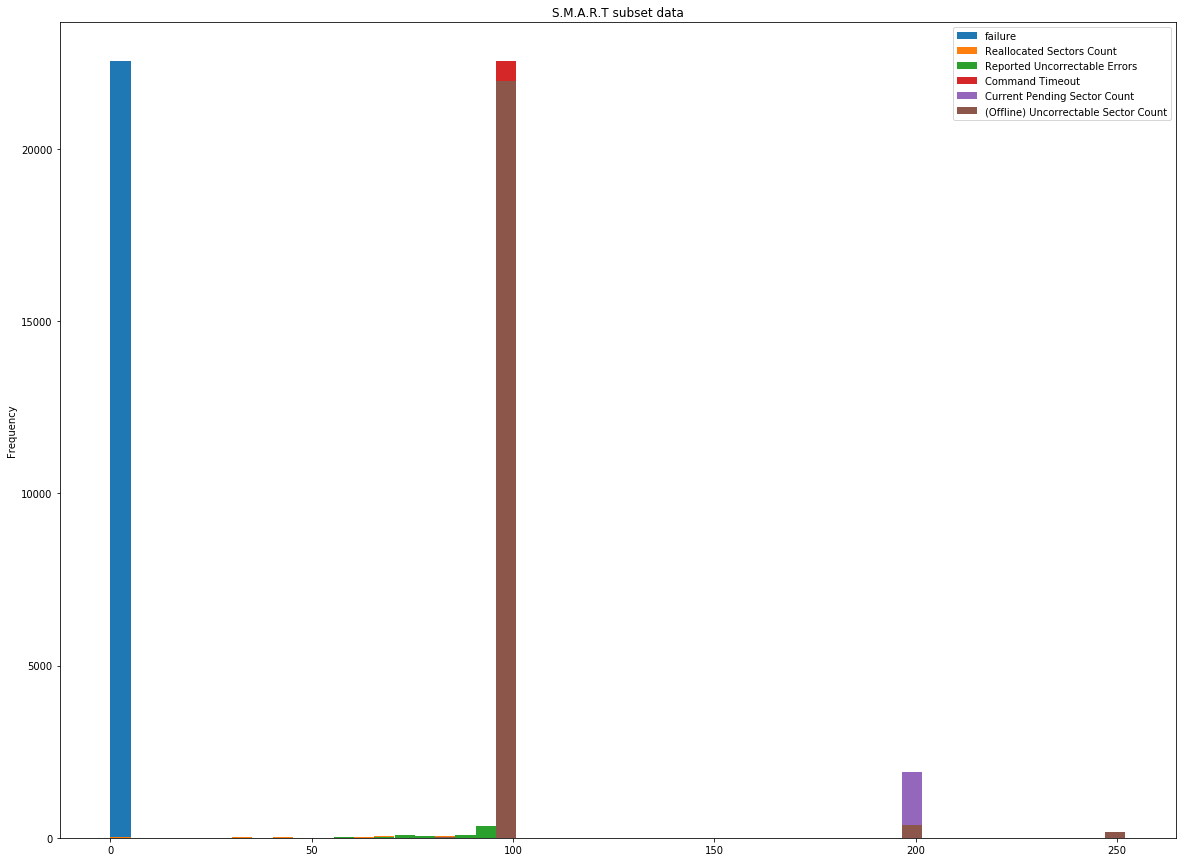

In [20]:
data1.sample(frac=0.3).plot.hist(figsize=(20,15), bins=50)
plt.title('S.M.A.R.T subset data')
plt.show()

### Visualize distribution by feature

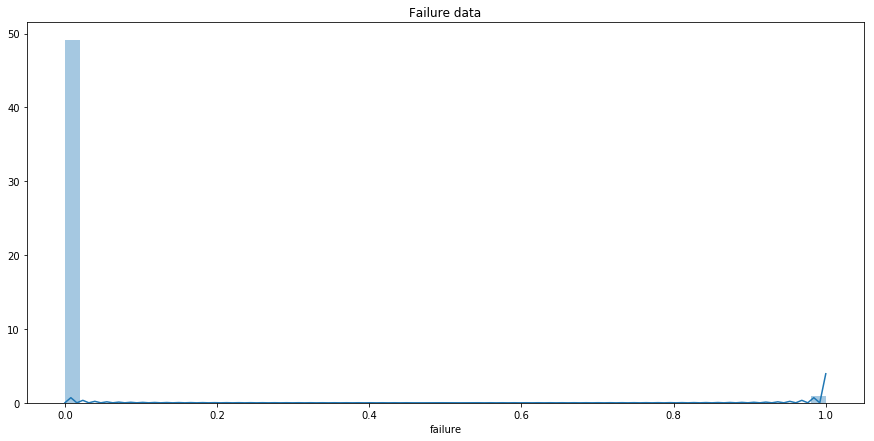

In [36]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['failure'])
plt.title('Failure data')
plt.show()

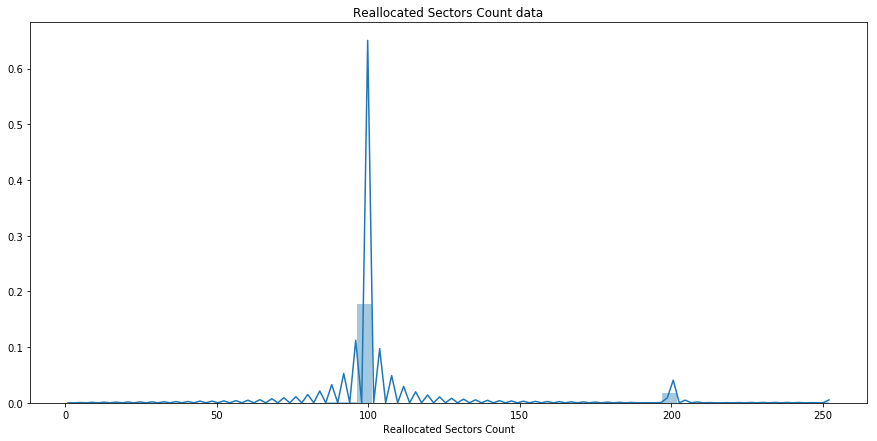

In [39]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Reallocated Sectors Count'])
plt.title('Reallocated Sectors Count data')
plt.show()

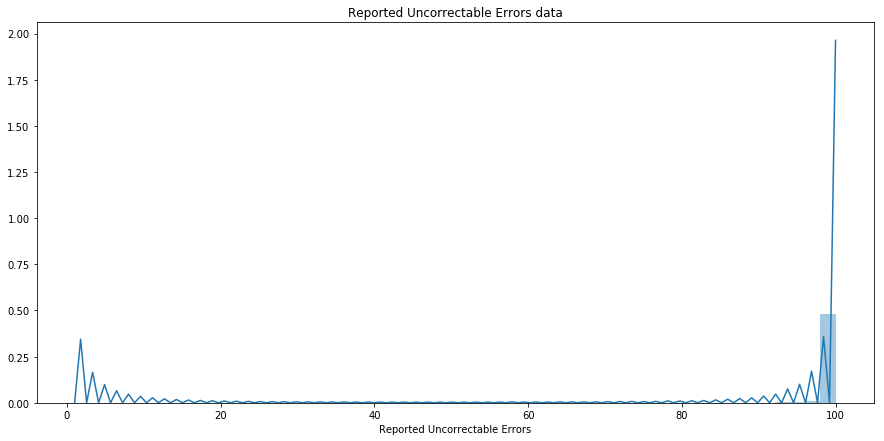

In [38]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Reported Uncorrectable Errors'])
plt.title('Reported Uncorrectable Errors data')
plt.show()

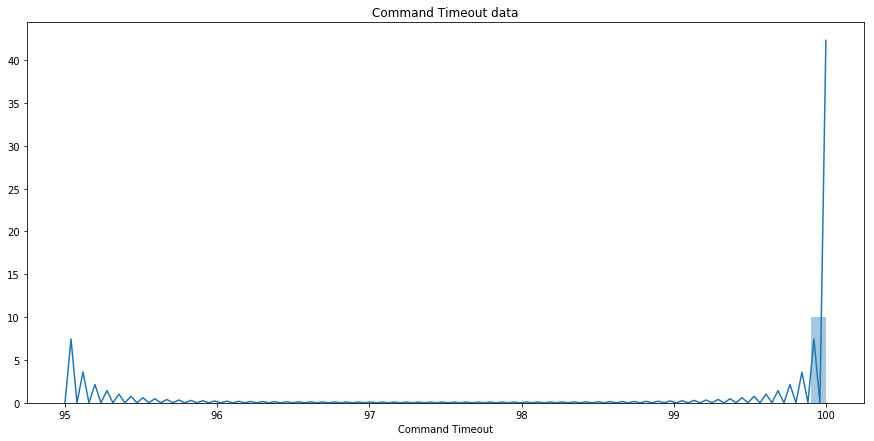

In [40]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Command Timeout'])
plt.title('Command Timeout data')
plt.show()

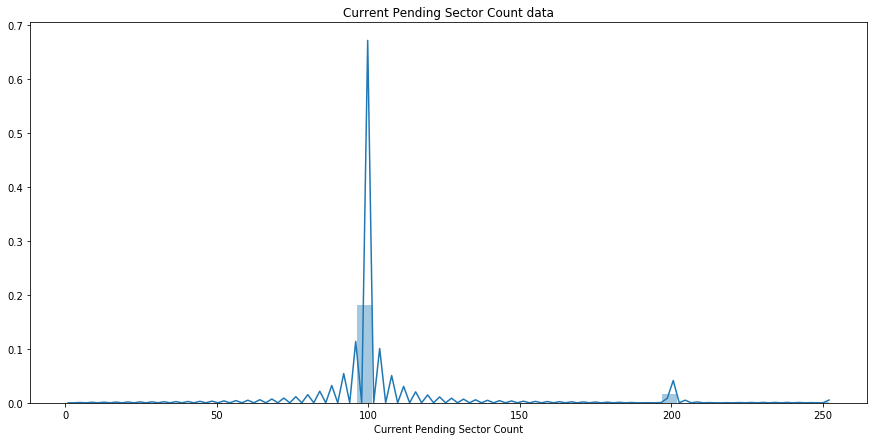

In [41]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['Current Pending Sector Count'])
plt.title('Current Pending Sector Count data')
plt.show()

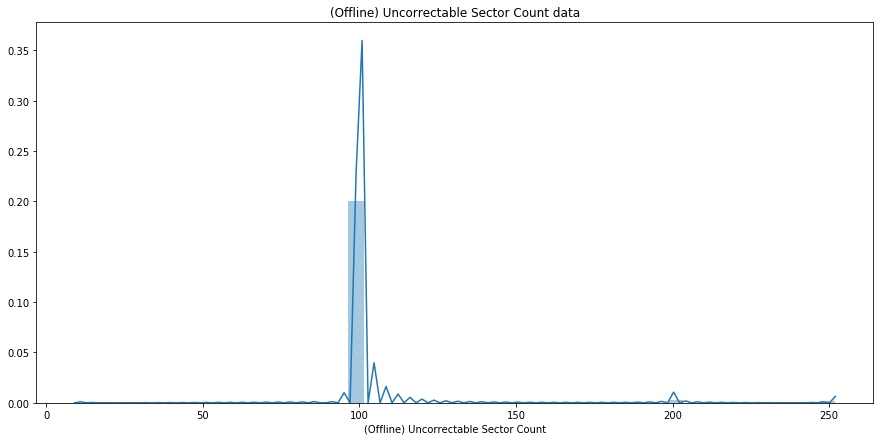

In [42]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(data1['(Offline) Uncorrectable Sector Count'])
plt.title('(Offline) Uncorrectable Sector Count data')
plt.show()

### Regression plots

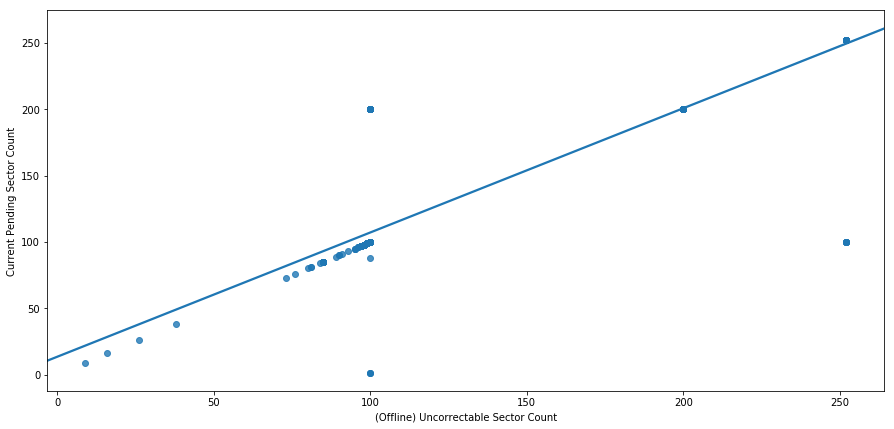

In [28]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['(Offline) Uncorrectable Sector Count'], data1['Current Pending Sector Count'])

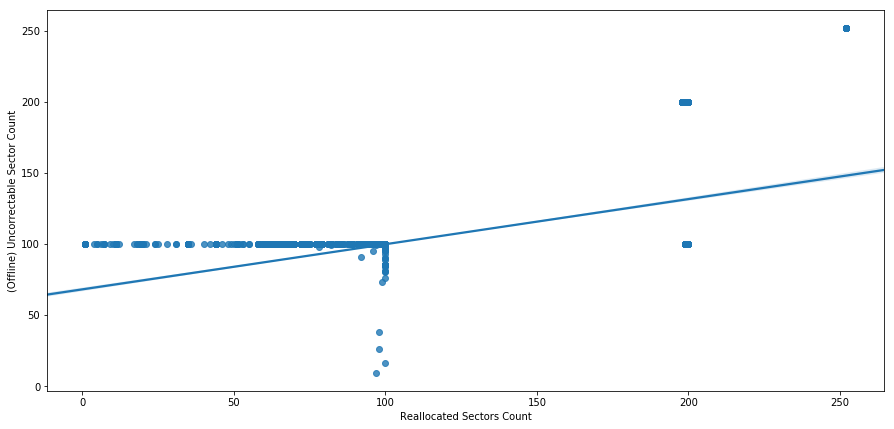

In [29]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Reallocated Sectors Count'], data1['(Offline) Uncorrectable Sector Count'])

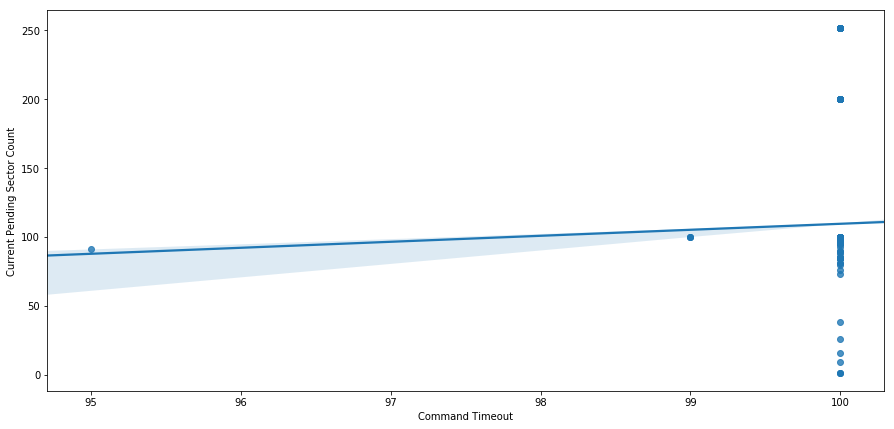

In [34]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Command Timeout'], data1['Current Pending Sector Count'])

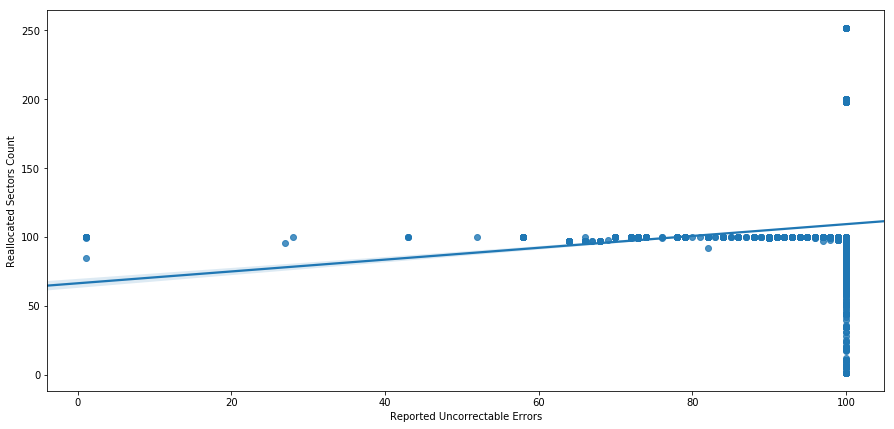

In [31]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.regplot(data1['Reported Uncorrectable Errors'], data1['Reallocated Sectors Count'])

## Task 4 Model fitting

### Decided to go with Random forest regression 

In [43]:
X = data1.drop(['failure'], axis = 1).values 
y = data1['failure'].values 

Storing the selected features labels

In [86]:
labels = ['Reallocated Sectors Count', 'Reported Uncorrectable Errors','Command Timeout', 
          'Current Pending Sector Count', '(Offline) Uncorrectable Sector Count']; labels

['Reallocated Sectors Count',
 'Reported Uncorrectable Errors',
 'Command Timeout',
 'Current Pending Sector Count',
 '(Offline) Uncorrectable Sector Count']

#### Spliting data in training and test set.

In [88]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Transforming and standardizing the data

In [89]:
#Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
model = RandomForestRegressor(n_jobs=-1)

Tried a bunch of different estimators 

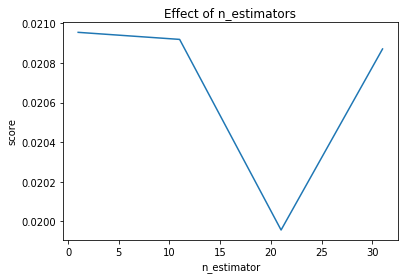

In [91]:
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### Predicting

Apply regressor to test set.

In [92]:
y_predicted = model.predict(X_test)

In [93]:
len(y_predicted), len(y_test)

(15026, 15026)

In [94]:
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
1,Reported Uncorrectable Errors,0.555156
3,Current Pending Sector Count,0.182983
0,Reallocated Sectors Count,0.157114
4,(Offline) Uncorrectable Sector Count,0.095243
2,Command Timeout,0.009503


'Reported Uncorrectable Errors' has a larg impact on the predicted outcome 

#### Determine accuracy

In [95]:
score = r2_score(y_test, y_predicted)
score

0.020870482544337543

#### Looking at XGBoost

In [97]:
model = xgb.XGBRegressor()

#### giving the model training data

In [98]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

#### Looking at the predictions
This did not work for me

In [99]:
y_preds = model.predict(X_test)

In [100]:
preds = [round(i) for i in y_preds]

In [101]:
from sklearn.metrics import explained_variance_score

In [102]:
print(explained_variance_score(predictions,y_test))

NameError: name 'predictions' is not defined

#### Cross Validate the model

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [104]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.00169399908873


## Task 5 Model evaluation

## Task 6 Produce recommendations